<img src="https://github.com/djp840/MSDS_432_Public/blob/main/images/NorthwesternHeader.png?raw=1">

## MSDS432 - Assignment 03 - Implement a Recursive Algorithm

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import time
import math
from decimal import Decimal

random.seed(123)

### Mount Google Drive to Colab Environment

In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive')

### Begin with the base code for factorial recursion

In [2]:
def rec_fact(x):
  if x == 1:
    return 1
  else:
    return x * rec_fact(x-1)

### Factorial using loop

In [3]:
def for_fact(x):
    temp = 1
    for x in range(1, x + 1):
        temp = temp * x
    return temp

### Create an array with ten numbers ranging in value from 100-500

In [4]:
array = random.sample(range(100, 501), 10)
array.sort()

### Execute the recursion and simple for loop for the random number array,
Recording the execution time with each execution.

In [5]:
times_for_loop = []
for i in range(len(array)):
    start = time.clock()
    for_fact(array[i])
    end = time.clock()
    times_for_loop.append((end - start) * 1000)
    
times_recursion = []
for i in range(len(array)):
    start = time.clock()
    rec_fact(array[i])
    end = time.clock()
    times_recursion.append((end - start) * 1000)

### Store factorials into a list

In [6]:
factorial = []
for i in range(len(array)):
    factorial.append("{:.10e}".format(Decimal(for_fact(array[i]))))    

### Calculate difference in time between Recursion and For Loop

In [7]:
times_diff = np.array(times_recursion) - np.array(times_for_loop)

### Create dataframe with times for Recursion, 
For Loop and Difference of time as well as factorial

In [8]:
df = pd.DataFrame(list(zip(array, times_recursion, times_for_loop, times_diff, factorial)),
              columns=['Numbers', 'Recursion Time', 'For Loop Time', 'Difference in Time', 'Factorial'])


In [9]:
df.round(3)

,Numbers,Recursion Time,For Loop Time,Difference in Time,Factorial
0,119,0.176,0.056,0.120,5.5745857612e+196
1,126,0.099,0.043,0.056,2.3721732429e+211
2,144,0.170,0.049,0.121,5.5502938327e+249
3,155,0.084,0.051,0.033,4.7891429015e+273
4,236,0.192,0.086,0.106,1.2572865218e+459
5,237,0.123,0.085,0.038,2.9797690567e+461
6,294,0.340,0.118,0.222,4.4149334380e+599
7,308,0.208,0.122,0.086,2.2615336402e+634
8,374,0.283,0.161,0.122,3.2618613316e+801
9,493,0.527,0.254,0.273,1.6290650610e+1115


### Plot Execution Times

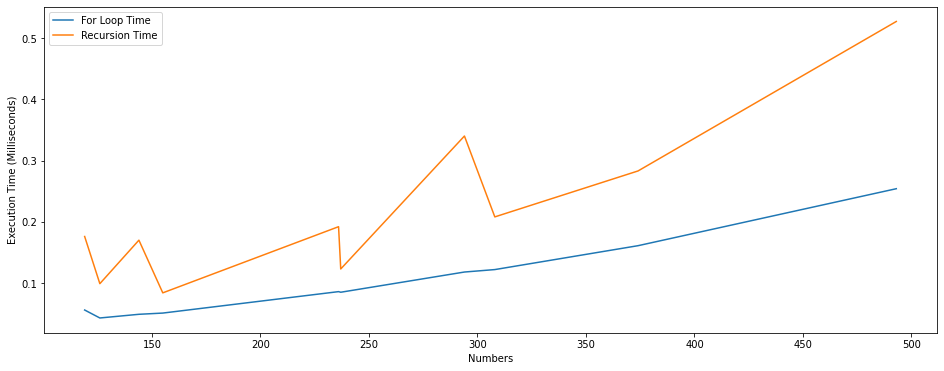

In [10]:
plt.figure(figsize=(16, 6))
ax = plt.gca()
df.plot(x='Numbers',y='For Loop Time',ax=ax)
df.plot(x='Numbers',y='Recursion Time', ax=ax)
plt.xlabel('Numbers')
plt.ylabel('Execution Time (Milliseconds)')
plt.show()